# Plots of races data

In [1]:
# Autoreload allows the notebook to dynamically load code: if we update some helper functions *outside* of the notebook, we do not need to reload the notebook.
%load_ext autoreload
%autoreload 2

In [3]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt

We load the dataset from a CSV file and display the first few rows to get an initial understanding of the data. This helps us verify that the data has been loaded correctly and gives us a glimpse of its structure and contents.

In [4]:
csv_file = "../data/races.csv"
dataset = pd.read_csv(csv_file)
dataset.head()

,_url,name,points,uci_points,length,climb_total,profile,startlist_quality,average_temperature,date,position,cyclist,cyclist_age,is_tarmac,is_cobbled,is_gravel,cyclist_team,delta
0,tour-de-france/1978/stage-6,Tour de France,100.0,NaN,162000.0,1101.0,1.0,1241,NaN,1978-07-05 04:02:24,0,sean-kelly,22.0,True,False,False,vini-ricordi-pinarello-sidermec-1986,0.0
1,tour-de-france/1978/stage-6,Tour de France,100.0,NaN,162000.0,1101.0,1.0,1241,NaN,1978-07-05 04:02:24,1,gerrie-knetemann,27.0,True,False,False,norway-1987,0.0
2,tour-de-france/1978/stage-6,Tour de France,100.0,NaN,162000.0,1101.0,1.0,1241,NaN,1978-07-05 04:02:24,2,rene-bittinger,24.0,True,False,False,NaN,0.0
3,tour-de-france/1978/stage-6,Tour de France,100.0,NaN,162000.0,1101.0,1.0,1241,NaN,1978-07-05 04:02:24,3,joseph-bruyere,30.0,True,False,False,navigare-blue-storm-1993,0.0
4,tour-de-france/1978/stage-6,Tour de France,100.0,NaN,162000.0,1101.0,1.0,1241,NaN,1978-07-05 04:02:24,4,sven-ake-nilsson,27.0,True,False,False,spain-1991,0.0


## Initial Info

Now we provide a concise summary of the DataFrame, including the number of non-null entries, data types of each column, and memory usage. It helps us quickly identify missing values and understand the overall structure of the dataset.

In [3]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 589865 entries, 0 to 589864
Data columns (total 18 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   _url                 589865 non-null  object 
 1   name                 589865 non-null  object 
 2   points               589388 non-null  float64
 3   uci_points           251086 non-null  float64
 4   length               589865 non-null  float64
 5   climb_total          442820 non-null  float64
 6   profile              441671 non-null  float64
 7   startlist_quality    589865 non-null  int64  
 8   average_temperature  29933 non-null   float64
 9   date                 589865 non-null  object 
 10  position             589865 non-null  int64  
 11  cyclist              589865 non-null  object 
 12  cyclist_age          589752 non-null  float64
 13  is_tarmac            589865 non-null  bool   
 14  is_cobbled           589865 non-null  bool   
 15  is_gravel        

Also, we generates a descriptive statistics for numerical columns in the DataFrame. It includes metrics such as count, mean, standard deviation, minimum, and maximum values, as well as the 25th, 50th, and 75th percentiles. This summary helps us understand the distribution and central tendency of the data.

In [10]:
dataset.describe()

,points,uci_points,length,climb_total,profile,startlist_quality,average_temperature,position,cyclist_age,delta
count,589388.000000,251086.000000,589865.000000,442820.000000,441671.000000,589865.000000,29933.000000,589865.000000,589752.000000,589865.000000
mean,89.221635,74.601547,166776.180584,2330.469215,2.611611,1101.161178,21.731768,74.219491,28.486208,418.292794
std,54.435330,100.947962,64545.605664,1375.710722,1.491741,380.586928,5.884761,48.404023,3.855631,842.961596
min,18.000000,6.000000,1000.000000,2.000000,1.000000,115.000000,10.000000,0.000000,13.000000,-6906.000000
25%,50.000000,16.000000,152500.000000,1309.000000,1.000000,844.000000,17.000000,32.000000,26.000000,10.000000
50%,80.000000,60.000000,178200.000000,2255.000000,2.000000,988.000000,22.000000,70.000000,28.000000,156.000000
75%,100.000000,100.000000,203500.000000,3273.000000,4.000000,1309.000000,26.000000,112.000000,31.000000,624.000000
max,350.000000,800.000000,338000.000000,6974.000000,5.000000,2047.000000,36.000000,209.000000,56.000000,61547.000000


We use the `value_counts()` method to count the occurrences of each unique value in specified columns of a DataFrame

In [4]:
# Count numer of same values in every column

#dataset['_url'].value_counts()
#dataset['name'].value_counts()
#dataset['points'].value_counts()
#dataset['uci_points'].value_counts()
#dataset['length'].value_counts()
#dataset['climb_total'].value_counts()
#dataset['profile'].value_counts()
#dataset['startlist_quality'].value_counts()
#dataset['average_temperature'].value_counts()
#dataset['date'].value_counts()
#dataset['position'].value_counts()
#dataset['cyclist'].value_counts()
#dataset['cyclist_age'].value_counts()
#dataset['is_tarmac'].value_counts()
#dataset['is_cobbled'].value_counts()
#dataset['is_gravel'].value_counts()
#dataset['cyclist_team'].value_counts()
#dataset['delta'].value_counts()


## Plots on 'points' data

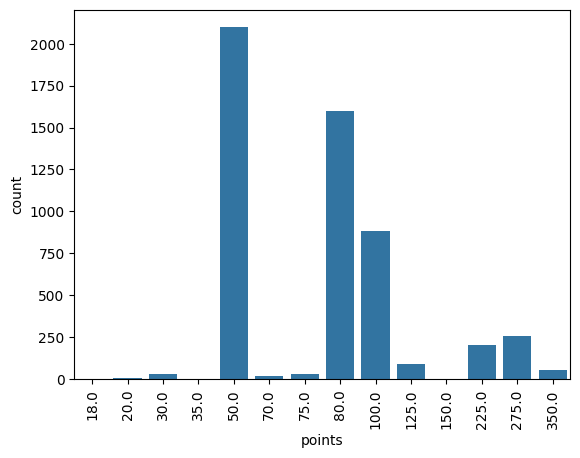

In [11]:
# Get unique data based on '_url' and 'points'
unique_data = dataset.dropna(subset=['points']).drop_duplicates(subset=['_url', 'points'])

# Plot how many races have a specific point
sb.countplot(x='points', data=unique_data)
plt.xticks(rotation=90)
plt.show()

In [ ]:
# Order the dataset by '_url' and drop rows where 'points' is NaN
ordered_dataset = dataset.dropna(subset=['points']).sort_values(by='_url')

# For each 'name', plot the 'points' for each '_url'
for name in ordered_dataset['name'].dropna().unique():
    # Get data for the current name
    name_data = ordered_dataset[ordered_dataset['name'] == name]
    # Get unique data based on '_url' and 'points'
    unique_data = name_data.drop_duplicates(subset=['_url', 'points'])

    plt.figure(figsize=(20, 5))
    sb.barplot(x='_url', y='points', data=unique_data)
    plt.xticks(rotation=90)
    plt.title(f'Distribution of "points" for {name}')
    plt.show()

## Plots on 'uci_points' data

## Plots on 'length' data

## Plots on 'climb_total' data

## Plots on 'profile' data

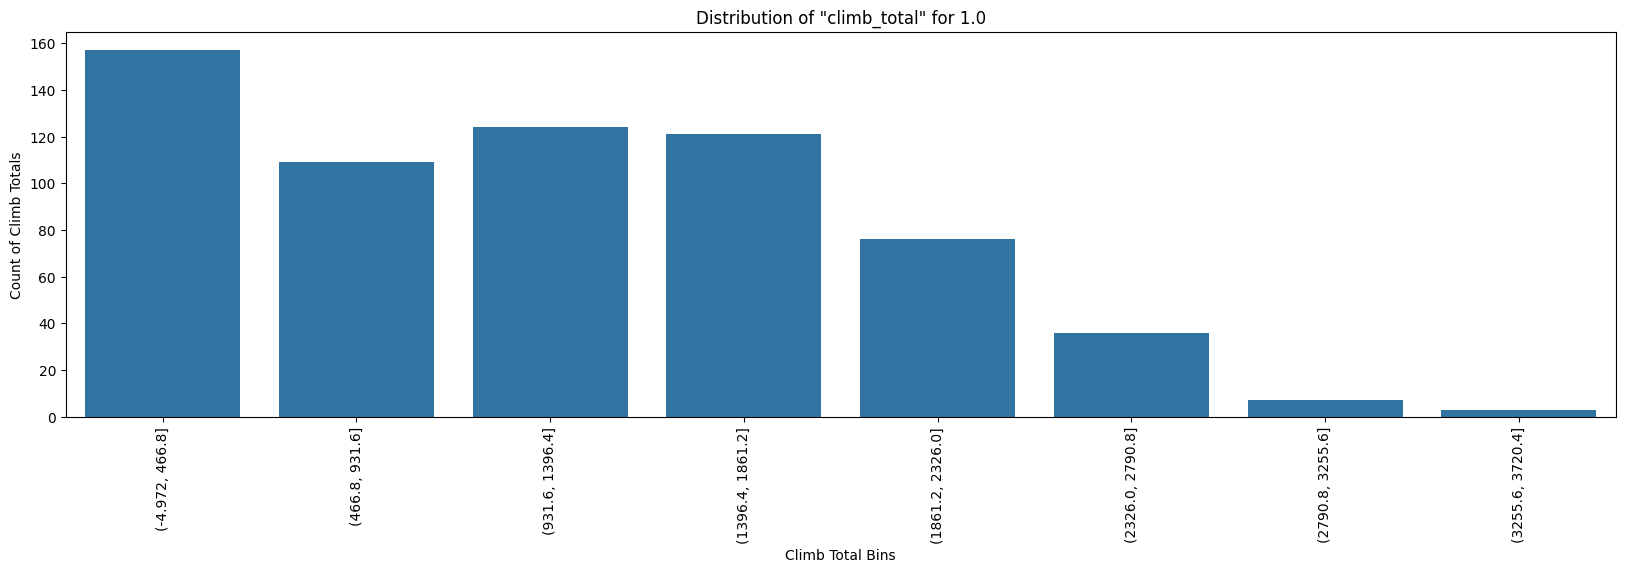

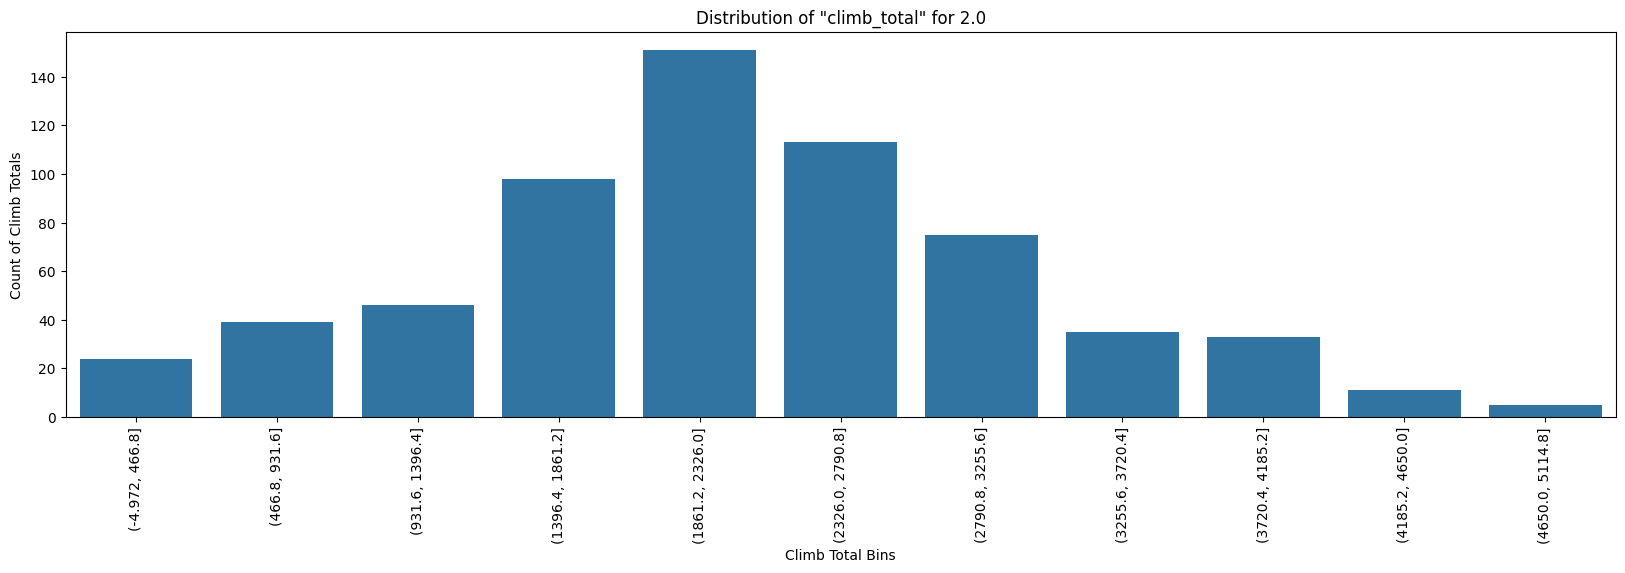

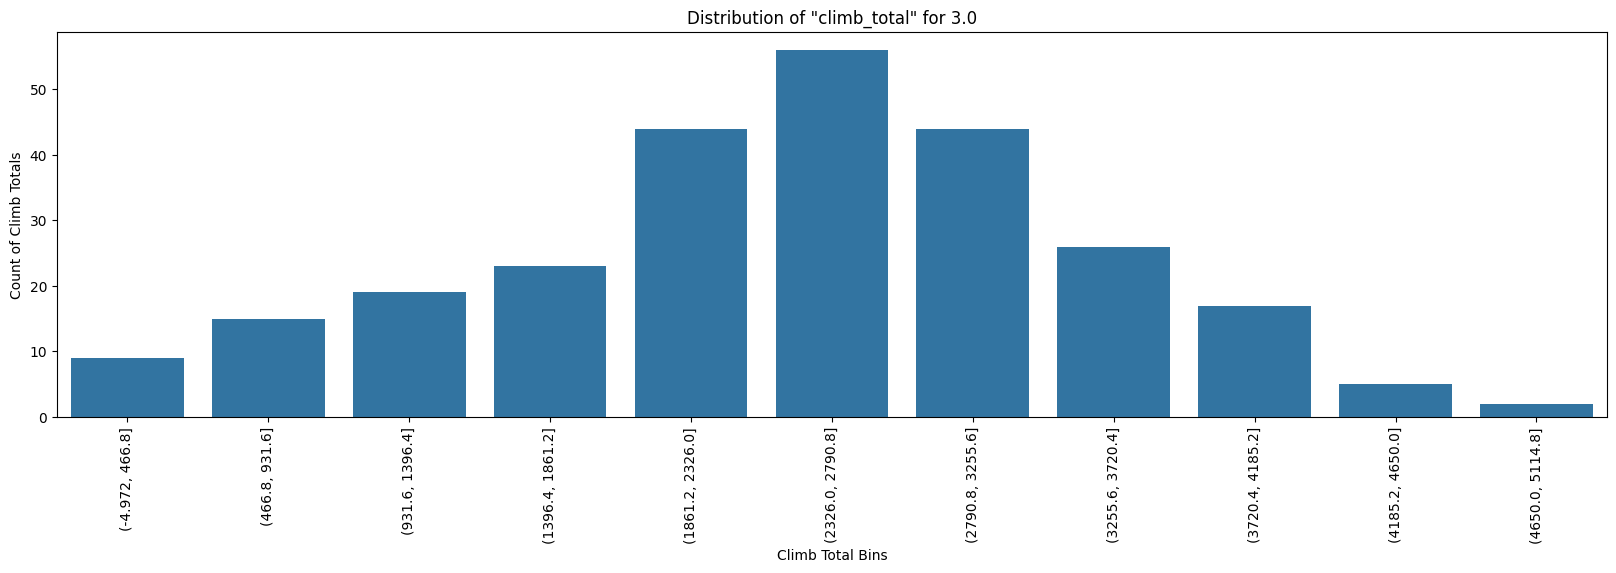

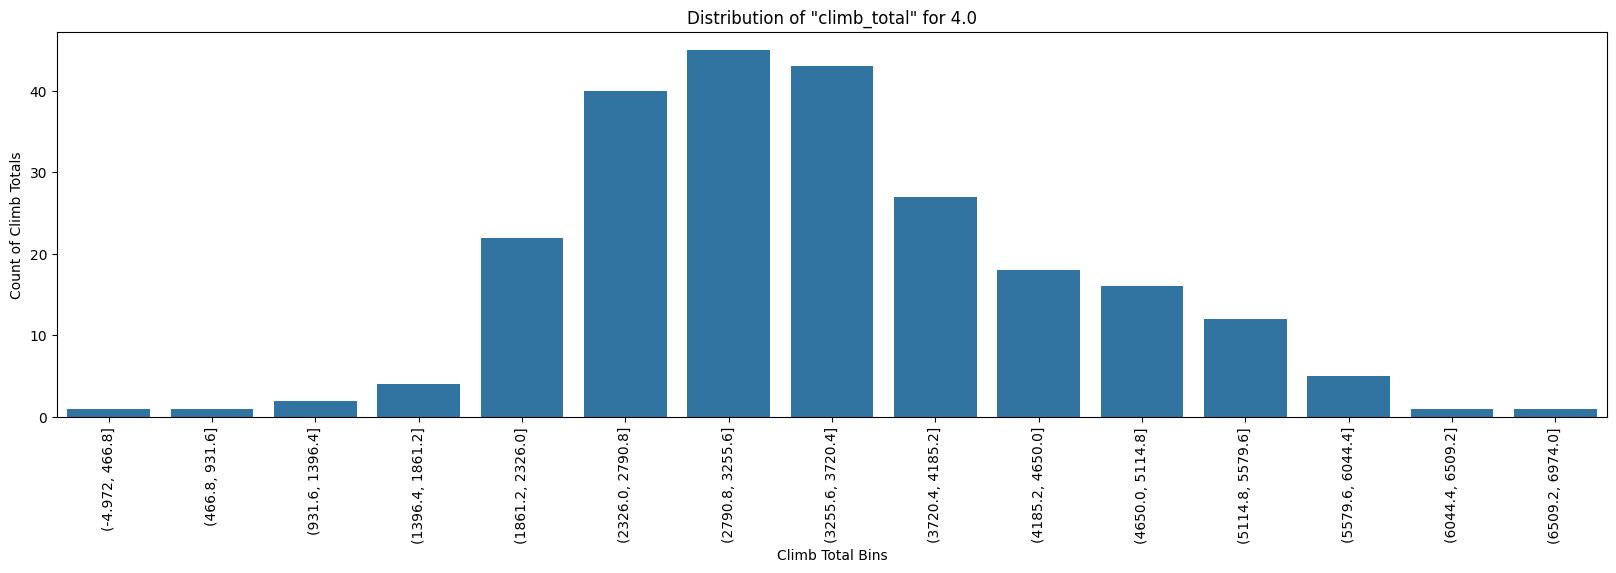

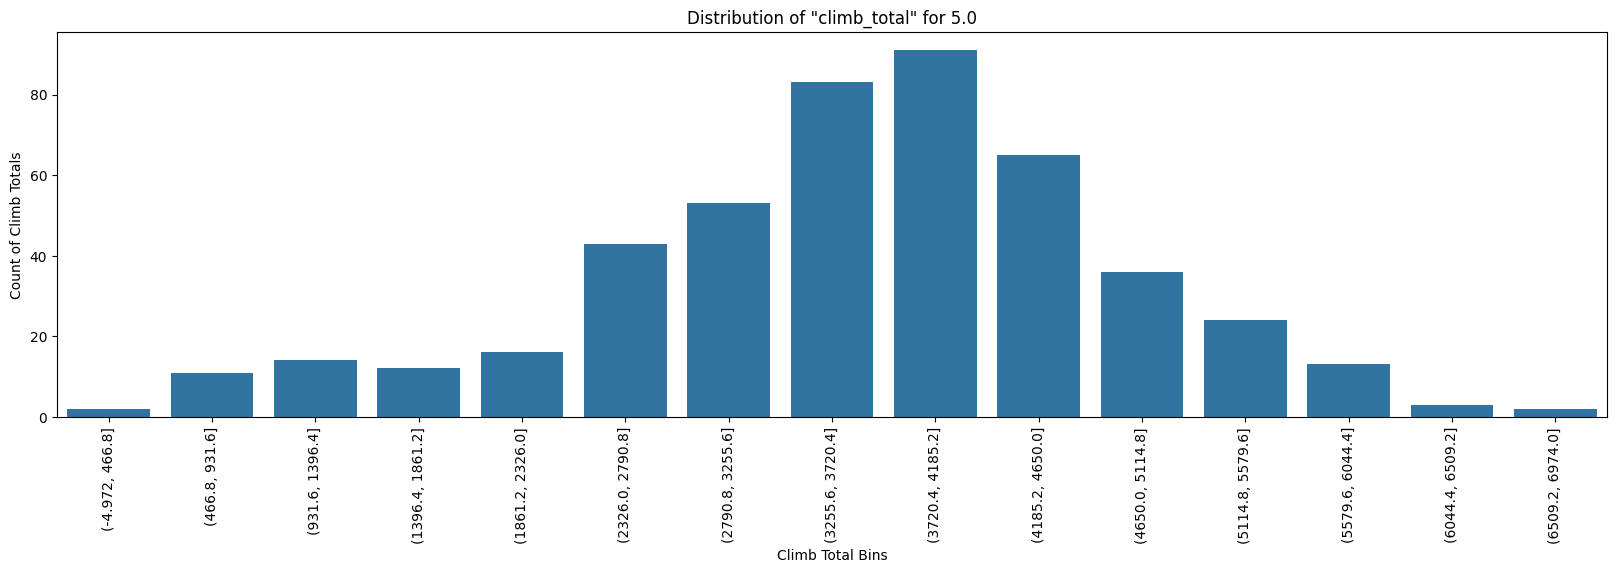

In [15]:
# Get unique data based on 'climb_total' and 'profile'
unique_data = dataset.dropna(subset=['climb_total', 'profile']).drop_duplicates(subset=['climb_total', 'profile']).sort_values(by='profile')

# Create a new column 'climb_bins' that bins the 'climb_total' into 15 bins
unique_data['climb_bins'] = pd.cut(unique_data['climb_total'], bins=15)

# For each 'profile'
profiles = unique_data['profile'].unique()
for profile in profiles:
    profile_data = unique_data[unique_data['profile'] == profile]
    
    plt.figure(figsize=(20, 5))
    sb.countplot(x='climb_bins', data=profile_data, order=sorted(profile_data['climb_bins'].unique()))

    plt.xticks(rotation=90)
    plt.title(f'Distribution of "climb_total" for {profile}')
    plt.xlabel('Climb Total Bins')
    plt.ylabel('Count of Climb Totals')
    plt.show()


## Plots on 'startlist_quality' data

## Plots on 'average_temperature' data

## Plots on 'position' data

## Plots on 'cyclist_age' data

## Plots on 'delta' data